Useful third-party libraries
================

How to install third-party libraries
-------

There are basically two ways to install third party libraries:

1. using the provided `setup.py` file
2. using python software managers like `pip`
3. Using software managers like `anaconda` (binaries) or `linuxbrew/homebrew`
4. using your operating system package managers (e.g. `apt-get` for debian-based linux distributions)

In [1]:
# setup.py example
# %%bash
# wget https://github.com/biopython/biopython/archive/biopython-168.tar.gz
# tar -xvf biopython-168.tar.gz
# cd biopython-168.tar.gz
# sudo python setup.py install

In [1]:
# using pip
!pip install biopython 

You are using pip version 8.1.1, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
# using anaconda
# !conda install biopython

In [4]:
# using ap-get
# !sudo apt-get install python-biopython python3-biopython

NumPy: array operations in python
-----------------------------------------------------------

You already encountered numpy as the "engine" that powers pandas. It is also used by many other third-party library to allow fast computation on arrays (i.e. scipy or scikit-learn).

The most important feature of NumPy is the ndarray (n-dimensional-array), which is a multidimensional matrix with fixed-type. This allows faster computation and more intuitive array manipulations.

In [5]:
import numpy as np

In [6]:
# simple array creation
a = np.array([2,3,4])
a

array([2, 3, 4])

In [7]:
# what type is my array?
a.dtype

dtype('int64')

In [8]:
b = np.array([1.2, 3.5, 5.1])
b

array([ 1.2,  3.5,  5.1])

In [9]:
b.dtype

dtype('float64')

We can check the dimensions of the array by using the `shape` method

In [10]:
b.shape

(3,)

Numpy offers several array constructors that can be quite handy.

In [11]:
# like range, but returns an array
np.arange(10, step=0.2)

array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
        2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
        4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
        6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
        8.8,  9. ,  9.2,  9.4,  9.6,  9.8])

In [12]:
# evenly-spaced numbers
np.linspace(0, 10, num=20)

array([  0.        ,   0.52631579,   1.05263158,   1.57894737,
         2.10526316,   2.63157895,   3.15789474,   3.68421053,
         4.21052632,   4.73684211,   5.26315789,   5.78947368,
         6.31578947,   6.84210526,   7.36842105,   7.89473684,
         8.42105263,   8.94736842,   9.47368421,  10.        ])

In [13]:
# evenly spaced numbers on a logaritmic space (base 2)
np.logspace(0, 10, num=20, base=2)

array([  1.00000000e+00,   1.44024654e+00,   2.07431009e+00,
         2.98751792e+00,   4.30276234e+00,   6.19703857e+00,
         8.92526334e+00,   1.28545796e+01,   1.85137638e+01,
         2.66643842e+01,   3.84032870e+01,   5.53102012e+01,
         7.96603257e+01,   1.14730508e+02,   1.65240217e+02,
         2.37986651e+02,   3.42759450e+02,   4.93658111e+02,
         7.10989385e+02,   1.02400000e+03])

In [14]:
np.zeros(10)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [15]:
# multidimensional
z = np.zeros((10, 5))
z

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [16]:
z.shape

(10, 5)

In [17]:
np.ones((10, 5))

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

Some of the operations you applied to dataframes apply to numpy arrays too

In [18]:
a = np.array((np.linspace(0, 10, num=10),
              np.logspace(0, 10, num=10),))
a

array([[  0.00000000e+00,   1.11111111e+00,   2.22222222e+00,
          3.33333333e+00,   4.44444444e+00,   5.55555556e+00,
          6.66666667e+00,   7.77777778e+00,   8.88888889e+00,
          1.00000000e+01],
       [  1.00000000e+00,   1.29154967e+01,   1.66810054e+02,
          2.15443469e+03,   2.78255940e+04,   3.59381366e+05,
          4.64158883e+06,   5.99484250e+07,   7.74263683e+08,
          1.00000000e+10]])

In [19]:
a.shape

(2, 10)

In [20]:
# equivalent to a.transpose(), but more concise
a.T

array([[  0.00000000e+00,   1.00000000e+00],
       [  1.11111111e+00,   1.29154967e+01],
       [  2.22222222e+00,   1.66810054e+02],
       [  3.33333333e+00,   2.15443469e+03],
       [  4.44444444e+00,   2.78255940e+04],
       [  5.55555556e+00,   3.59381366e+05],
       [  6.66666667e+00,   4.64158883e+06],
       [  7.77777778e+00,   5.99484250e+07],
       [  8.88888889e+00,   7.74263683e+08],
       [  1.00000000e+01,   1.00000000e+10]])

In [21]:
a.T.shape

(10, 2)

In [22]:
a.mean()

541962164.43336391

In [23]:
np.std(a)

2176334532.9328117

In [24]:
np.median(a)

9.4444444444444446

We can also cahnge the dimension of the array

In [25]:
# rows/columns
a.reshape(4, 5)

array([[  0.00000000e+00,   1.11111111e+00,   2.22222222e+00,
          3.33333333e+00,   4.44444444e+00],
       [  5.55555556e+00,   6.66666667e+00,   7.77777778e+00,
          8.88888889e+00,   1.00000000e+01],
       [  1.00000000e+00,   1.29154967e+01,   1.66810054e+02,
          2.15443469e+03,   2.78255940e+04],
       [  3.59381366e+05,   4.64158883e+06,   5.99484250e+07,
          7.74263683e+08,   1.00000000e+10]])

In [27]:
# rows/columns
a.reshape(6, 5)

ValueError: total size of new array must be unchanged

Mathematical operations on arrays are quite simple

In [29]:
b = np.array((np.linspace(0, 10, num=5),
              np.logspace(0, 10, num=5),))

In [30]:
a + b

ValueError: operands could not be broadcast together with shapes (2,10) (2,5) 

In [31]:
b = np.array((np.linspace(0, 10, num=10),
              np.logspace(0, 10, num=10),))
a + b

array([[  0.00000000e+00,   2.22222222e+00,   4.44444444e+00,
          6.66666667e+00,   8.88888889e+00,   1.11111111e+01,
          1.33333333e+01,   1.55555556e+01,   1.77777778e+01,
          2.00000000e+01],
       [  2.00000000e+00,   2.58309933e+01,   3.33620107e+02,
          4.30886938e+03,   5.56511880e+04,   7.18762733e+05,
          9.28317767e+06,   1.19896850e+08,   1.54852737e+09,
          2.00000000e+10]])

In [32]:
a - b

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [33]:
a**2

array([[  0.00000000e+00,   1.23456790e+00,   4.93827160e+00,
          1.11111111e+01,   1.97530864e+01,   3.08641975e+01,
          4.44444444e+01,   6.04938272e+01,   7.90123457e+01,
          1.00000000e+02],
       [  1.00000000e+00,   1.66810054e+02,   2.78255940e+04,
          4.64158883e+06,   7.74263683e+08,   1.29154967e+11,
          2.15443469e+13,   3.59381366e+15,   5.99484250e+17,
          1.00000000e+20]])

In [34]:
a > 5

array([[False, False, False, False, False,  True,  True,  True,  True,
         True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True]], dtype=bool)

In [35]:
a[a > 5]

array([  5.55555556e+00,   6.66666667e+00,   7.77777778e+00,
         8.88888889e+00,   1.00000000e+01,   1.29154967e+01,
         1.66810054e+02,   2.15443469e+03,   2.78255940e+04,
         3.59381366e+05,   4.64158883e+06,   5.99484250e+07,
         7.74263683e+08,   1.00000000e+10])

In [36]:
# element-wise product
a * b

array([[  0.00000000e+00,   1.23456790e+00,   4.93827160e+00,
          1.11111111e+01,   1.97530864e+01,   3.08641975e+01,
          4.44444444e+01,   6.04938272e+01,   7.90123457e+01,
          1.00000000e+02],
       [  1.00000000e+00,   1.66810054e+02,   2.78255940e+04,
          4.64158883e+06,   7.74263683e+08,   1.29154967e+11,
          2.15443469e+13,   3.59381366e+15,   5.99484250e+17,
          1.00000000e+20]])

In [37]:
a.shape

(2, 10)

In [38]:
# matrix product
a = np.random.random((3, 3))
b = np.random.random((3, 3))
np.dot(a, b)

array([[ 1.25202681,  1.14120776,  1.16183376],
       [ 0.91491665,  0.82358997,  0.77759943],
       [ 0.89658309,  0.84384356,  0.80666068]])

**Indexing and splicing**

In [39]:
a = np.random.random((3, 5))

In [40]:
# get row 1
a[1]

array([ 0.17729414,  0.10694347,  0.22584673,  0.72932164,  0.44354711])

In [42]:
# get column 1
a[:,1]

array([ 0.28034467,  0.10694347,  0.47014563])

In [43]:
a = np.random.random((3, 5, 2))
a

array([[[ 0.91167191,  0.90714898],
        [ 0.61071954,  0.39497317],
        [ 0.30454867,  0.50195528],
        [ 0.9824825 ,  0.74384967],
        [ 0.8322759 ,  0.92792685]],

       [[ 0.42101823,  0.9028073 ],
        [ 0.09184705,  0.7880417 ],
        [ 0.48465703,  0.07919901],
        [ 0.98166642,  0.8559245 ],
        [ 0.52155527,  0.81091301]],

       [[ 0.06743029,  0.95109574],
        [ 0.13713628,  0.93701279],
        [ 0.22488301,  0.65961515],
        [ 0.45748181,  0.21656602],
        [ 0.03610582,  0.37445372]]])

In [44]:
a[1, 1:4, 1]

array([ 0.7880417 ,  0.07919901,  0.8559245 ])

SciPy: scientific python
-----------------------------------------------------------

SciPy is a very large library of scientific calculations and statistics to be performed on numpy array.

The modules contained in this library are the following:

- Special functions (scipy.special)
- Integration (scipy.integrate)
- Optimization (scipy.optimize)
- Interpolation (scipy.interpolate)
- Fourier Transforms (scipy.fftpack)
- Signal Processing (scipy.signal)
- Linear Algebra (scipy.linalg)
- Sparse Eigenvalue Problems with ARPACK
- Compressed Sparse Graph Routines (scipy.sparse.csgraph)
- Spatial data structures and algorithms (scipy.spatial)
- Statistics (scipy.stats)
- Multidimensional image processing (scipy.ndimage)
- File IO (scipy.io)
- Weave (scipy.weave)

They are clearly too many to go through them, but it is worth to highlight the statistical module

In [45]:
from scipy import stats

In [46]:
# get samples from a normal distribution
# loc: mean
# scale: std
n = stats.norm.rvs(loc=0, scale=1, size=100)
n

array([ 0.07073738, -0.83372846,  1.14764746, -0.70490055,  1.24434484,
       -1.87477802, -0.82445615, -0.47428828, -1.09031953, -0.89080194,
        0.10300198,  1.57835513,  0.52416919,  0.42961903,  0.48661548,
        0.03461833,  1.15415757,  1.13484167, -0.86738422,  0.09634861,
       -0.35754799,  1.62833294, -0.38446628,  1.78510185,  1.41073076,
        0.59817222, -0.77133475, -1.52031904,  0.58876947,  1.77030767,
       -1.27897851,  0.65519997, -0.12397685,  0.9291305 ,  1.33538481,
       -0.2969452 ,  2.47215459, -0.63014463, -0.92921258, -0.51533325,
       -2.00175416,  0.51255847, -0.56421177, -0.67011065,  1.48914503,
       -0.75312561, -0.56610727,  0.11143445,  0.10392492,  0.8375039 ,
        1.12466212,  0.0966476 , -0.47777173,  1.45959774, -0.32245293,
       -1.77279955, -1.55793923,  0.80971451,  0.01827316, -0.02893384,
       -0.77824293, -0.29819603, -0.4606492 ,  0.20172045,  1.32758462,
       -0.54361688,  0.0596146 , -1.73361635,  2.94062933,  0.19

In [47]:
stats.normaltest(n)

NormaltestResult(statistic=0.99143303812063033, pvalue=0.60913429456197066)

In [48]:
n1 = stats.norm.rvs(loc=0, scale=1, size=100)
n2 = stats.norm.rvs(loc=0.5, scale=1, size=100)

In [49]:
# ttest
stats.ttest_ind(n1, n2)

Ttest_indResult(statistic=-2.5032168867136555, pvalue=0.013115461312553506)

In [50]:
# Kolmogorov-Smirnoff test
stats.ks_2samp(n1, n2)

Ks_2sampResult(statistic=0.20000000000000001, pvalue=0.031376652153072532)

In [51]:
table = [[1, 15],
         [10, 20]]
stats.fisher_exact(table)

(0.13333333333333333, 0.067937086952416736)

In [52]:
table = [[1, 15],
         [10, 20]]
stats.fisher_exact(table, alternative='less')

(0.13333333333333333, 0.040128644033470856)

Biopython: the swiss-army-knife library for bioinformatics
-----------------------------------------------------------

Biopython (http://biopython.org/wiki/Biopython) is a collection of libraries to manipulate files related to computational biology, from sequence data to pdb files. It allows the conversion between formats and even the interrogation of commonly used databases, such as NCBI and KEGG.

**Sequence manipulations**

Biopython uses a complex series of objects to respresent biological sequences: `SeqRecord`, `Seq` and so on. In most of the cases the user is not expected to create a sequence but to read it, so learning how to manipulate sequences is relatively easy.

When a sequence is read from a file it comes as a `SeqRecord` object, which can handle annotations on top of a sequence.

As in many biopython modules, parsing can be done either through the `parse` or the `read` method. The first one acts as an `iterator`, which means that it can be used in a `for` loop to access one sequence at a time. The latter is used when the file contains one and only one record.

In [55]:
from Bio import SeqIO

s = SeqIO.read('../data/proteome.faa', 'fasta')

ValueError: More than one record found in handle

In [56]:
sequences = SeqIO.parse('../data/proteome.faa', 'fasta')
sequences

<generator object parse at 0x7fd3477b0cd0>

In [57]:
for s in sequences:
    print(s.id)
    break

sp|P52697|6PGL_ECOLI


In [58]:
type(s)

Bio.SeqRecord.SeqRecord

In [59]:
dir(s)

['__add__',
 '__bool__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le___',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_per_letter_annotations',
 '_seq',
 '_set_per_letter_annotations',
 '_set_seq',
 'annotations',
 'dbxrefs',
 'description',
 'features',
 'format',
 'id',
 'letter_annotations',
 'lower',
 'name',
 'reverse_complement',
 'seq',
 'upper']

In [60]:
s.description

'sp|P52697|6PGL_ECOLI 6-phosphogluconolactonase OS=Escherichia coli (strain K12) GN=pgl PE=1 SV=2'

Sequences can be sliced as strings; the actual sequence can be found under the attribute `seq`.

In [61]:
# first 10 aminoacids
s[:10]

SeqRecord(seq=Seq('MKQTVYIASP', SingleLetterAlphabet()), id='sp|P52697|6PGL_ECOLI', name='sp|P52697|6PGL_ECOLI', description='sp|P52697|6PGL_ECOLI 6-phosphogluconolactonase OS=Escherichia coli (strain K12) GN=pgl PE=1 SV=2', dbxrefs=[])

In [62]:
s[:10].seq

Seq('MKQTVYIASP', SingleLetterAlphabet())

In [63]:
str(s[10:20].seq)

'ESQQIHVWNL'

**Sequence formats conversion**

We are going to take a genome in genbank format (https://www.ncbi.nlm.nih.gov/Sitemap/samplerecord.html) and convert it to the much simpler Fasta format.

In [64]:
# a quick look at how a GenBank file looks like
!head ../data/ecoli.gbk

LOCUS       NC_000913            4641652 bp    DNA     circular CON 15-MAY-2014
DEFINITION  Escherichia coli str. K-12 substr. MG1655, complete genome.
ACCESSION   NC_000913
VERSION     NC_000913.3  GI:556503834
DBLINK      BioProject: PRJNA57779
            BioSample: SAMN02604091
KEYWORDS    RefSeq.
SOURCE      Escherichia coli str. K-12 substr. MG1655
  ORGANISM  Escherichia coli str. K-12 substr. MG1655
            Bacteria; Proteobacteria; Gammaproteobacteria; Enterobacteriales;


In [65]:
# a quick look at how a GenBank file looks like
!tail ../data/ecoli.gbk

  4641121 tttcccgaca ttggctgaat cgttacacga tgtcgatttc actgtcgcca ccactgcgcg
  4641181 cagtcgggcg aaatatcatt actacgccac gccagttgaa ctggtgccgc tgttagagga
  4641241 aaaatcttca tggatgagcc atgccgcgct ggtgtttggt cgcgaagatt ccgggttgac
  4641301 taacgaagag ttagcgttgg ctgacgttct tactggtgtg ccgatggtgg cggattatcc
  4641361 ttcgctcaat ctggggcagg cggtgatggt ctattgctat caattagcaa cattaataca
  4641421 acaaccggcg aaaagtgatg caacggcaga ccaacatcaa ctgcaagctt tacgcgaacg
  4641481 agccatgaca ttgctgacga ctctggcagt ggcagatgac ataaaactgg tcgactggtt
  4641541 acaacaacgc ctggggcttt tagagcaacg agacacggca atgttgcacc gtttgctgca
  4641601 tgatattgaa aaaaatatca ccaaataaaa aacgccttag taagtatttt tc
//


In [66]:
s = SeqIO.read('../data/ecoli.gbk', 'genbank')
SeqIO.write(s, 'ecoli.fasta', 'fasta')

1

**Sequence manipulation example**

In [67]:
# forward
str(s[1000:2000].seq)

'GTTGCGAGATTTGGACGGACGTTGACGGGGTCTATACCTGCGACCCGCGTCAGGTGCCCGATGCGAGGTTGTTGAAGTCGATGTCCTACCAGGAAGCGATGGAGCTTTCCTACTTCGGCGCTAAAGTTCTTCACCCCCGCACCATTACCCCCATCGCCCAGTTCCAGATCCCTTGCCTGATTAAAAATACCGGAAATCCTCAAGCACCAGGTACGCTCATTGGTGCCAGCCGTGATGAAGACGAATTACCGGTCAAGGGCATTTCCAATCTGAATAACATGGCAATGTTCAGCGTTTCTGGTCCGGGGATGAAAGGGATGGTCGGCATGGCGGCGCGCGTCTTTGCAGCGATGTCACGCGCCCGTATTTCCGTGGTGCTGATTACGCAATCATCTTCCGAATACAGCATCAGTTTCTGCGTTCCACAAAGCGACTGTGTGCGAGCTGAACGGGCAATGCAGGAAGAGTTCTACCTGGAACTGAAAGAAGGCTTACTGGAGCCGCTGGCAGTGACGGAACGGCTGGCCATTATCTCGGTGGTAGGTGATGGTATGCGCACCTTGCGTGGGATCTCGGCGAAATTCTTTGCCGCACTGGCCCGCGCCAATATCAACATTGTCGCCATTGCTCAGGGATCTTCTGAACGCTCAATCTCTGTCGTGGTAAATAACGATGATGCGACCACTGGCGTGCGCGTTACTCATCAGATGCTGTTCAATACCGATCAGGTTATCGAAGTGTTTGTGATTGGCGTCGGTGGCGTTGGCGGTGCGCTGCTGGAGCAACTGAAGCGTCAGCAAAGCTGGCTGAAGAATAAACATATCGACTTACGTGTCTGCGGTGTTGCCAACTCGAAGGCTCTGCTCACCAATGTACATGGCCTTAATCTGGAAAACTGGCAGGAAGAACTGGCGCAAGCCAAAGAGCCGTTTAATCTCGGGCGCTTAATTCGCCTCGTGAAAGAATATCATCTGCTGAACCCGGTCATTGTTGACTGCA

In [68]:
# reverse complement
str(s[1000:2000].reverse_complement().seq)

'GTGCAGTCAACAATGACCGGGTTCAGCAGATGATATTCTTTCACGAGGCGAATTAAGCGCCCGAGATTAAACGGCTCTTTGGCTTGCGCCAGTTCTTCCTGCCAGTTTTCCAGATTAAGGCCATGTACATTGGTGAGCAGAGCCTTCGAGTTGGCAACACCGCAGACACGTAAGTCGATATGTTTATTCTTCAGCCAGCTTTGCTGACGCTTCAGTTGCTCCAGCAGCGCACCGCCAACGCCACCGACGCCAATCACAAACACTTCGATAACCTGATCGGTATTGAACAGCATCTGATGAGTAACGCGCACGCCAGTGGTCGCATCATCGTTATTTACCACGACAGAGATTGAGCGTTCAGAAGATCCCTGAGCAATGGCGACAATGTTGATATTGGCGCGGGCCAGTGCGGCAAAGAATTTCGCCGAGATCCCACGCAAGGTGCGCATACCATCACCTACCACCGAGATAATGGCCAGCCGTTCCGTCACTGCCAGCGGCTCCAGTAAGCCTTCTTTCAGTTCCAGGTAGAACTCTTCCTGCATTGCCCGTTCAGCTCGCACACAGTCGCTTTGTGGAACGCAGAAACTGATGCTGTATTCGGAAGATGATTGCGTAATCAGCACCACGGAAATACGGGCGCGTGACATCGCTGCAAAGACGCGCGCCGCCATGCCGACCATCCCTTTCATCCCCGGACCAGAAACGCTGAACATTGCCATGTTATTCAGATTGGAAATGCCCTTGACCGGTAATTCGTCTTCATCACGGCTGGCACCAATGAGCGTACCTGGTGCTTGAGGATTTCCGGTATTTTTAATCAGGCAAGGGATCTGGAACTGGGCGATGGGGGTAATGGTGCGGGGGTGAAGAACTTTAGCGCCGAAGTAGGAAAGCTCCATCGCTTCCTGGTAGGACATCGACTTCAACAACCTCGCATCGGGCACCTGACGCGGGTCGCAGGTATAGACCCCGTCAACGTCCGTCCAAATCTCGCAA

**GenBank format features extraction**

In [69]:
# first four features of this genbank file
for feat in s.features[:5]:
    print(feat)
    print('')

type: source
location: [0:4641652](+)
qualifiers:
    Key: db_xref, Value: ['taxon:511145']
    Key: mol_type, Value: ['genomic DNA']
    Key: organism, Value: ['Escherichia coli str. K-12 substr. MG1655']
    Key: strain, Value: ['K-12']
    Key: sub_strain, Value: ['MG1655']


type: gene
location: [189:255](+)
qualifiers:
    Key: db_xref, Value: ['EcoGene:EG11277', 'GeneID:944742']
    Key: gene, Value: ['thrL']
    Key: gene_synonym, Value: ['ECK0001; JW4367']
    Key: locus_tag, Value: ['b0001']


type: CDS
location: [189:255](+)
qualifiers:
    Key: GO_process, Value: ['GO:0009088 - threonine biosynthetic process']
    Key: codon_start, Value: ['1']
    Key: db_xref, Value: ['GI:16127995', 'ASAP:ABE-0000006', 'UniProtKB/Swiss-Prot:P0AD86', 'EcoGene:EG11277', 'GeneID:944742']
    Key: function, Value: ['leader; Amino acid biosynthesis: Threonine']
    Key: gene, Value: ['thrL']
    Key: gene_synonym, Value: ['ECK0001; JW4367']
    Key: locus_tag, Value: ['b0001']
    Key: product,

In [70]:
type(feat)

Bio.SeqFeature.SeqFeature

Features (more properly `SeqFeature` objects), contain all the information related to an annotation that belongs to a sequence. The most notable attributes are position, strand and qualifiers.

In [71]:
feat.location.start, feat.location.end, feat.strand

(ExactPosition(336), ExactPosition(2799), 1)

In [72]:
feat.qualifiers

{'EC_number': ['1.1.1.3', '2.7.2.4'],
 'GO_component': ['GO:0005737 - cytoplasm'],
 'GO_process': ['GO:0009088 - threonine biosynthetic process',
  'GO:0009086 - methionine biosynthetic process',
  'GO:0009090 - homoserine biosynthetic process'],
 'codon_start': ['1'],
 'db_xref': ['GI:16127996',
  'ASAP:ABE-0000008',
  'UniProtKB/Swiss-Prot:P00561',
  'EcoGene:EG10998',
  'GeneID:945803'],
 'experiment': ['N-terminus verified by Edman degradation: PMID 354697,4562989'],
 'function': ['enzyme; Amino acid biosynthesis: Threonine'],
 'gene': ['thrA'],
 'gene_synonym': ['ECK0002; Hs; JW0001; thrA1; thrA2; thrD'],
 'locus_tag': ['b0002'],
 'note': ['bifunctional: aspartokinase I (N-terminal); homoserine dehydrogenase I (C-terminal)'],
 'product': ['Bifunctional aspartokinase/homoserine dehydrogenase 1'],
 'protein_id': ['NP_414543.1'],
 'transl_table': ['11'],
 'translation': ['MRVLKFGGTSVANAERFLRVADILESNARQGQVATVLSAPAKITNHLVAMIEKTISGQDALPNISDAERIFAELLTGLAAAQPGFPLAQLKTFVDQEFAQIKHVLHGISLLGQ

In [73]:
# we can also translate the original sequence
s[feat.location.start:feat.location.end].seq.translate()

Seq('MRVLKFGGTSVANAERFLRVADILESNARQGQVATVLSAPAKITNHLVAMIEKT...GV*', HasStopCodon(ExtendedIUPACProtein(), '*'))

In [74]:
# we can also translate the original sequence (let's remove the last codon)
s[feat.location.start:feat.location.end-3].seq.translate()

Seq('MRVLKFGGTSVANAERFLRVADILESNARQGQVATVLSAPAKITNHLVAMIEKT...LGV', ExtendedIUPACProtein())

**Reading PDB files**

In [75]:
# fetch pdb file
!wget http://www.rcsb.org/pdb/files/1g59.pdb

--2016-11-23 11:36:05--  http://www.rcsb.org/pdb/files/1g59.pdb
Resolving www.rcsb.org (www.rcsb.org)... failed: Temporary failure in name resolution.
wget: unable to resolve host address ‘www.rcsb.org’


In [76]:
from Bio.PDB.PDBParser import PDBParser

parser = PDBParser()
structure = parser.get_structure('1g59', '1g59.pdb')
header = parser.get_header()
# fetch the structural method and the resolution
print('Method: {0}'.format(header['structure_method']))
print('Resolution: {0}'.format(header['resolution']))

Method: x-ray diffraction
Resolution: 2.4


/home/mgalactus/.local/lib/python2.7/site-packages/Bio/PDB/StructureBuilder.py:85: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11427.
  PDBConstructionWarning)
/home/mgalactus/.local/lib/python2.7/site-packages/Bio/PDB/StructureBuilder.py:85: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 11461.
  PDBConstructionWarning)
/home/mgalactus/.local/lib/python2.7/site-packages/Bio/PDB/StructureBuilder.py:85: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11500.
  PDBConstructionWarning)
/home/mgalactus/.local/lib/python2.7/site-packages/Bio/PDB/StructureBuilder.py:85: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11607.
  PDBConstructionWarning)


The returned object (`structure`) has a complex structure, which follows the structure, model, chain, residue, atom hierarchy (SMCRA).

```
Structure['1g59']
  |
  +---- Model[0]
          |
          +---- Chain['A']
          |       |
          |       +---- Residue[' ', 1, ' ']
          |       |       |
          |       |       +---- Atom['N']
          |       |       |
          |       |       +---- [...]
          |       |       |
          |       |       +---- Atom['CE']
          |       |
          |       +---- [...]
          |       |
          |       +---- Residue[' ', 468, ' '] [...]
          |
          +---- Chain['B'] [...]
          |
          +---- Chain['C'] [...]
          |
          +---- Chain['D'] [...]
          |
          +---- Chain[' ']
                  |
                  +---- Residue['W', 1, ' ']
                  |       |
                  |       +---- Atom['O']
                  |
                  +---- [...]
                  |
                  +---- Residue['W', 283, ' '] [...]
```

In [77]:
model = structure[0]
chain = model['A']
residue = chain[(' ', 1, ' ')]
atom = residue['CE']

In [78]:
chain.id

'A'

In [79]:
residue.id[1], residue.resname

(1, 'MET')

In [80]:
atom.name, atom.occupancy, atom.bfactor, atom.coord

('CE',
 1.0,
 50.12,
 array([ 39.10900116,  79.59600067,  29.96500015], dtype=float32))

**Read/manipulate phylogenetic trees**

The `Bio.Phylo` module allow to read/write/manipulate phylogenetic treesd, as well as run  complex evolutionary analysis software like `codeml`.

*Note:* even though `Bio.Phylo` can be used to draw phylogenetic trees, other libraries such as `ete3` are suggested for their great power and versatility.

In [81]:
from Bio import Phylo

In [83]:
tree = Phylo.read('../data/tree.nwk', 'nexus')

ValueError: There are no trees in this file.

In [84]:
tree = Phylo.read('../data/tree.nwk', 'newick')

In [85]:
dir(tree)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_filter_search',
 'as_phyloxml',
 'clade',
 'collapse',
 'collapse_all',
 'common_ancestor',
 'count_terminals',
 'depths',
 'distance',
 'find_any',
 'find_clades',
 'find_elements',
 'format',
 'from_clade',
 'get_nonterminals',
 'get_path',
 'get_terminals',
 'id',
 'is_bifurcating',
 'is_monophyletic',
 'is_parent_of',
 'is_preterminal',
 'is_terminal',
 'ladderize',
 'name',
 'prune',
 'randomized',
 'root',
 'root_at_midpoint',
 'root_with_outgroup',
 'rooted',
 'split',
 'total_branch_length',
 'trace',
 'weight']

In [86]:
# very simple visualization of a tree
Phylo.draw_ascii(tree)

  , Rickettsia_helvetica_C9P9
  |
  , Rickettsia_endosymbiont_of_Ixodes_sca...
  |
  , Rickettsia_montanensis_str._OSU_85-930
  |
  , Rickettsia_honei_RB
  |
  , Rickettsia_africae_ESF-5
  |
  | Rickettsia_parkeri_str._Portsmouth
  |
  , Rickettsia_sibirica_subsp._mongolitim...
  |
  , Rickettsia_sibirica_246
  |
  | Rickettsia_sibirica_subsp._sibirica_B...
  |
  , Rickettsia_conorii_subsp._caspia_A-167
  |
  | Rickettsia_conorii_subsp._israelensis...
  |
  , Rickettsia_conorii_str._Malish_7
  |
  | Rickettsia_conorii_subsp._indica_ITTR
  |
  , Rickettsia_slovaca_13-B
  |
  | Rickettsia_slovaca_str._D-CWPP
  |
  , Rickettsia_peacockii_str._Rustic
  |
  , Rickettsia_philipii_str._364D
  |
  , Rickettsia_rickettsii_str._Hlp#2
  |
  , Rickettsia_rickettsii_str._Colombia
  |
  , Sheila_Smith
  |
  | Rickettsia_rickettsii_str._Brazil
  |
  , Rickettsia_rickettsii_str._Arizona
  |
  , Rickettsia_rickettsii_str._Hauke
  |
  , Rickettsia_rickettsii_str._Hino
  |
 ,| Rickettsia_rickettsii_str._

In [87]:
# get a list of terminal nodes
tree.get_terminals()

[Clade(branch_length=0.0170792118522, name='Rickettsia_helvetica_C9P9'),
 Clade(branch_length=0.015764723869, name='Rickettsia_endosymbiont_of_Ixodes_scapularis'),
 Clade(branch_length=0.00715358013595, name='Rickettsia_montanensis_str._OSU_85-930'),
 Clade(branch_length=0.00373132363309, name='Rickettsia_honei_RB'),
 Clade(branch_length=0.00282074752703, name='Rickettsia_africae_ESF-5'),
 Clade(branch_length=0.00173589147444, name='Rickettsia_parkeri_str._Portsmouth'),
 Clade(branch_length=0.00147637167432, name='Rickettsia_sibirica_subsp._mongolitimonae_HA-91'),
 Clade(branch_length=0.00022070411919, name='Rickettsia_sibirica_246'),
 Clade(branch_length=0.000244228635268, name='Rickettsia_sibirica_subsp._sibirica_BJ-90'),
 Clade(branch_length=0.00110763237249, name='Rickettsia_conorii_subsp._caspia_A-167'),
 Clade(branch_length=0.00132492168672, name='Rickettsia_conorii_subsp._israelensis_ISTT_CDC1'),
 Clade(branch_length=0.000261226638287, name='Rickettsia_conorii_str._Malish_7'),
 

Each bifurcation and terminal node in the tree is a `Clade` object, with several network like properties. Most of the attributes and methods are shared with the `Tree` object.

In [88]:
node = tree.get_terminals()[0]

In [89]:
dir(node)

['__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__getitem__',
 '__hash__',
 '__init__',
 '__iter__',
 '__len__',
 '__module__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_color',
 '_filter_search',
 '_get_color',
 '_set_color',
 'branch_length',
 'clades',
 'collapse',
 'collapse_all',
 'color',
 'comment',
 'common_ancestor',
 'confidence',
 'count_terminals',
 'depths',
 'distance',
 'find_any',
 'find_clades',
 'find_elements',
 'get_nonterminals',
 'get_path',
 'get_terminals',
 'is_bifurcating',
 'is_monophyletic',
 'is_parent_of',
 'is_preterminal',
 'is_terminal',
 'ladderize',
 'name',
 'prune',
 'root',
 'split',
 'total_branch_length',
 'trace',
 'width']

In [90]:
# distance between root and our node
print('Distance between root and "{0}": {1}'.format(node.name,
                                                  tree.distance(tree.root, node)))

Distance between root and "Rickettsia_helvetica_C9P9": 0.054998177777


In [91]:
# the root can be changed too
tree.root_at_midpoint()

In [92]:
Phylo.draw_ascii(tree)

                      __________ Caulobacter_crescentus_CB15
                     |
            _________|__________ Oceanicaulis_alexandrii_HTCC2633
           |         |
           |         |_____ Oceanicaulis_sp._HTCC2633
          _|
         | |      _______ Pseudovibrio_sp._JE062
         | |    _|
         | |___| |_______ Brucella_suis_1330
        _|     |
       | |     |__________ Bradyrhizobium_japonicum_USDA_110
       | |
     __| |         _______ Sphingomonas_wittichii_RW1
    |  | |________|
    |  |          |________ Erythrobacter_litoralis_HTCC2594
  __|  |
 |  |  |______________ Granulibacter_bethesdensis_CGDNIH1
 |  |
 |  |______________ Candidatus_Odyssella_thessalonicensis...
 |
 |                        , Orientia_tsutsugamushi_str._Ikeda
 |         _______________|
 |        |               | Orientia_tsutsugamushi_str._Boryong
 |        |
 |        |          , Rickettsia_bellii_RML369-C
 |        |         _|
 |        |        | | Rickettsia_bellii_OSU_85

**Interrogate the NCBI database using Bio.Entrez**

The NCBI has a very useful programmatic interface for data retrieval, for which BioPython has a very complex module. Find more information about Entrez here: https://www.ncbi.nlm.nih.gov/books/NBK3837/

In [2]:
from Bio import Entrez
Entrez.email = 'your@email.org'

In this minimal example we are going to link a Bioproject ID to a NCBI taxonomy record. The possibility of the interface are numerous and complex, given that also pubmed and its reach metadata can be reached through Entrez.

In [3]:
r = Entrez.esearch(db='bioproject',
                   term='PRJNA57779')
h = Entrez.read(r)

In [4]:
h

{u'Count': '1', u'RetMax': '1', u'IdList': ['57779'], u'TranslationStack': [{u'Count': '1', u'Field': 'All Fields', u'Term': 'PRJNA57779[All Fields]', u'Explode': 'N'}, 'GROUP'], u'TranslationSet': [], u'RetStart': '0', u'QueryTranslation': 'PRJNA57779[All Fields]'}

In [5]:
bioproject_id = h['IdList'][0]

In [6]:
r = Entrez.elink(dbfrom='bioproject', id=bioproject_id, linkname='bioproject_taxonomy')
h = Entrez.read(r)

In [7]:
h

[{u'LinkSetDb': [{u'DbTo': 'taxonomy', u'Link': [{u'Id': '511145'}], u'LinkName': 'bioproject_taxonomy'}], u'DbFrom': 'bioproject', u'IdList': ['57779'], u'LinkSetDbHistory': [], u'ERROR': []}]

In [8]:
taxonomy_id = h[0]['LinkSetDb'][0]['Link'][0]['Id']
taxonomy_id

'511145'

In [9]:
r = Entrez.efetch(db='taxonomy', id=taxonomy_id)

In [10]:
h = Entrez.read(r)

In [12]:
h

[{u'Lineage': 'cellular organisms; Bacteria; Proteobacteria; Gammaproteobacteria; Enterobacterales; Enterobacteriaceae; Escherichia; Escherichia coli; Escherichia coli K-12', u'Division': 'Bacteria', u'ParentTaxId': '83333', u'PubDate': '2008/03/16 18:00:08', u'LineageEx': [{u'ScientificName': 'cellular organisms', u'TaxId': '131567', u'Rank': 'no rank'}, {u'ScientificName': 'Bacteria', u'TaxId': '2', u'Rank': 'superkingdom'}, {u'ScientificName': 'Proteobacteria', u'TaxId': '1224', u'Rank': 'phylum'}, {u'ScientificName': 'Gammaproteobacteria', u'TaxId': '1236', u'Rank': 'class'}, {u'ScientificName': 'Enterobacterales', u'TaxId': '91347', u'Rank': 'order'}, {u'ScientificName': 'Enterobacteriaceae', u'TaxId': '543', u'Rank': 'family'}, {u'ScientificName': 'Escherichia', u'TaxId': '561', u'Rank': 'genus'}, {u'ScientificName': 'Escherichia coli', u'TaxId': '562', u'Rank': 'species'}, {u'ScientificName': 'Escherichia coli K-12', u'TaxId': '83333', u'Rank': 'no rank'}], u'CreateDate': '2008/

NetworkX: Cytoscape-like library
-----------------------------------------------------------

This library collects many well-known algorithms to inspect graphs and network properties.

Graphs are encoded in a dictionary-like way, allowing easy and intuitive parsing. Simple plotting functions are available as well.

In [13]:
import networkx as nx

In [14]:
# undirected graph
g = nx.Graph()

# add nodes
g.add_node('eggs', price=2.5)
g.add_node('spam', price=3.1, rating=1)

# add edges
g.add_edge('eggs', 'spam', rating=3)
g.add_edge('steak', 'spam')

# add edges (and implicitly new nodes)
g.add_edge('eggs', 'omelette')
g.add_edge('vanilla', 'fudge')

In [15]:
g.nodes()

['omelette', 'spam', 'eggs', 'steak', 'fudge', 'vanilla']

In [16]:
g.edges()

[('omelette', 'eggs'),
 ('spam', 'eggs'),
 ('spam', 'steak'),
 ('fudge', 'vanilla')]

In [17]:
# access nodes and edges with a dictionary-like syntax
g.node['eggs']

{'price': 2.5}

In [18]:
g['eggs']

{'omelette': {}, 'spam': {'rating': 3}}

In [19]:
g['eggs']['spam']

{'rating': 3}

In [20]:
g['spam']['eggs']

{'rating': 3}

All the obvious properties can be easily computed.

In [21]:
nx.degree(g)

{'eggs': 2, 'fudge': 1, 'omelette': 1, 'spam': 2, 'steak': 1, 'vanilla': 1}

In [22]:
nx.betweenness_centrality(g)

{'eggs': 0.2,
 'fudge': 0.0,
 'omelette': 0.0,
 'spam': 0.2,
 'steak': 0.0,
 'vanilla': 0.0}

In [23]:
nx.edge_betweenness_centrality(g)

{('fudge', 'vanilla'): 0.06666666666666667,
 ('omelette', 'eggs'): 0.2,
 ('spam', 'eggs'): 0.26666666666666666,
 ('spam', 'steak'): 0.2}

In [24]:
for component in nx.connected_components(g):
    print(component)

set(['omelette', 'eggs', 'steak', 'spam'])
set(['vanilla', 'fudge'])


**Graph visualization example**

In [25]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
import random

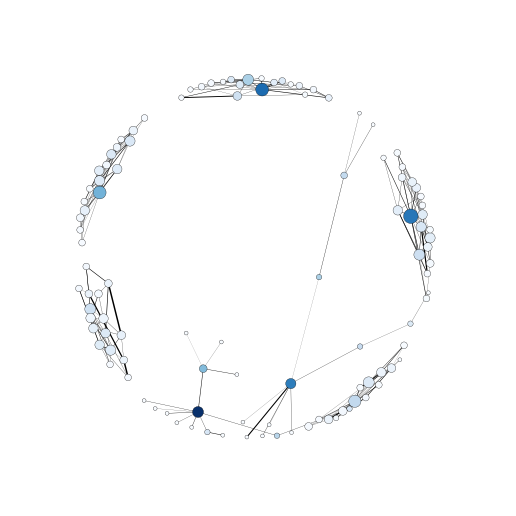

In [26]:
# Generate a series of random graphs
gs = [nx.random_graphs.powerlaw_cluster_graph(n=random.randint(10, 20),
                                             m=random.randint(1, 3),
                                             p=random.random()*0.05)
      for x in range(7)]

# Concatenate then in a single graph
# (there might be a more efficient way)
g = gs[0]
for g1 in gs[1:]:
    i = max(g.nodes()) + 1
    g.add_edges_from([(x+i, y+i) for (x, y) in g1.edges()])

# Calculate nodes and edge properties
# to have something to plot
betw_cent = nx.betweenness.betweenness_centrality(g).values()
edge_betw_cent = nx.edge_betweenness_centrality(g).values()

# Graph layout
graph_pos = nx.layout.fruchterman_reingold_layout(g)

plt.figure(figsize=(9, 9))

# Draw nodes
nx.draw_networkx_nodes(g, graph_pos,
                       # Node size depends on node degree
                       node_size=[x*15 for x in nx.degree(g).values()],
                       # Node color depends on node centrality
                       node_color=betw_cent,
                       cmap=plt.get_cmap('Blues'),
                       vmax=max(betw_cent),
                       vmin=0)
# Draw edges
nx.draw_networkx_edges(g, graph_pos,
                       # Width depends on edge centrality
                       width=[x*250 for x in edge_betw_cent],
                       color='k')
sns.despine(bottom=True, left=True)
plt.xticks([])
plt.yticks([]);

Scikit-learn: machine learning
-------------

scikit-learn is the most used library for machine learning (but you might want to look into TensorFlow if you like deep-learning). It includes both supervised and unsupervised learning, clustering, feature reduction (PCA) and several pre-processing and performance metrics.

Despite the great number of algorithms implemented in the library, the structure is similar for all of them, making it easier to use them. Advanced usage include pipelines and advanced cross-validations.

**Example: clusterization of the Iris dataset**

Datasets in `sciki.learn` follow the scheme `(n_samples, n_features)`; using `numpy.ndarrays` or `pandas.dataFrames` is advised.

In [27]:
from sklearn import datasets

In [28]:
datasets.load_iris()

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [29]:
iris = datasets.load_iris()

In [30]:
# rows are observations, columns are features
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [31]:
# true label for each observation
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [32]:
# label names
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

A good practicein machine learning is to normalize the features, so that larger ones don\'t influence the clusterization process more than the others. 

In [33]:
from sklearn import preprocessing

In [34]:
# the simplest preprocessing is to standardize the data
std_scaler = preprocessing.StandardScaler()
iris.data = std_scaler.fit_transform(iris.data)

In [35]:
from sklearn.cluster import KMeans

Most algorithms have a `fit` method for training and then either a `transform` or a `predict` method that acts on new data.

In [36]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(iris.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [37]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [38]:
# once the model has been fitted, we can add a new observation and can try to predict to which cluster they belong to
kmeans.predict([[5.8,  2.7,  4.0,  1.25],])

array([2], dtype=int32)

We are going to plot the dataset (using only two features for semplicity), together with the true labels (glyphs) and the clusters (colors). 

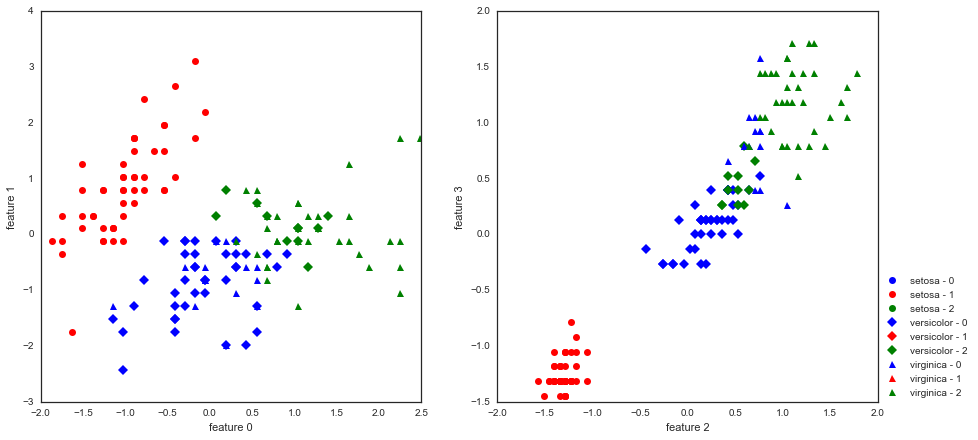

In [39]:
plt.figure(figsize=(15, 7))

plt.subplot(121)
for label, glyph in zip(set(iris.target), ('o', 'D', '^')):
    for cluster, color in zip(set(kmeans.labels_), ('b', 'r', 'g')):
        plt.plot(iris.data[(iris.target == label) & (kmeans.labels_ == cluster)][:, 0],
                 iris.data[(iris.target == label) & (kmeans.labels_ == cluster)][:, 1],
                 marker=glyph,
                 linestyle='',
                 color=color,
                 label='{0} - {1}'.format(iris.target_names[label],
                                          cluster))
plt.xlabel('feature 0')
plt.ylabel('feature 1')

plt.subplot(122)
for label, glyph in zip(set(iris.target), ('o', 'D', '^')):
    for cluster, color in zip(set(kmeans.labels_), ('b', 'r', 'g')):
        plt.plot(iris.data[(iris.target == label) & (kmeans.labels_ == cluster)][:, 2],
                 iris.data[(iris.target == label) & (kmeans.labels_ == cluster)][:, 3],
                 marker=glyph,
                 linestyle='',
                 color=color,
                 label='{0} - {1}'.format(iris.target_names[label],
                                          cluster))
plt.xlabel('feature 2')
plt.ylabel('feature 3')
plt.legend(loc=(1, 0));

The clustering is separating the three categories with a decent discriminative power; we can use some metrics implemented in scikit-learn to be more precise. We are going to use an homogeinity score to measure how "pure" each cluster is.

In [40]:
from sklearn import metrics

In [41]:
metrics.homogeneity_score(iris.target, kmeans.labels_)

0.65912650180490084

**Linear model classifier example**

In a real world scenario we would need to divide our dataset into a training and test set; for that purpose the `sklearn.cross_validation` module should be used.

In [42]:
from sklearn.linear_model import RidgeClassifier

The Ridge linear classifier has a parameter `alpha` that influences the fitting process; it is advisable to perform an additional cross-validation on the training data to find the optimal value for it.

In [43]:
ridge = RidgeClassifier(alpha=1.0)
ridge.fit(iris.data, iris.target)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)

In [44]:
predictions = ridge.predict(iris.data)

In [45]:
metrics.f1_score(iris.target, predictions, average=None)

array([ 1.        ,  0.74157303,  0.79279279])

With this `alpha` parameter we are probably not overfitting the model, as we are not correctly predicting even the training data!

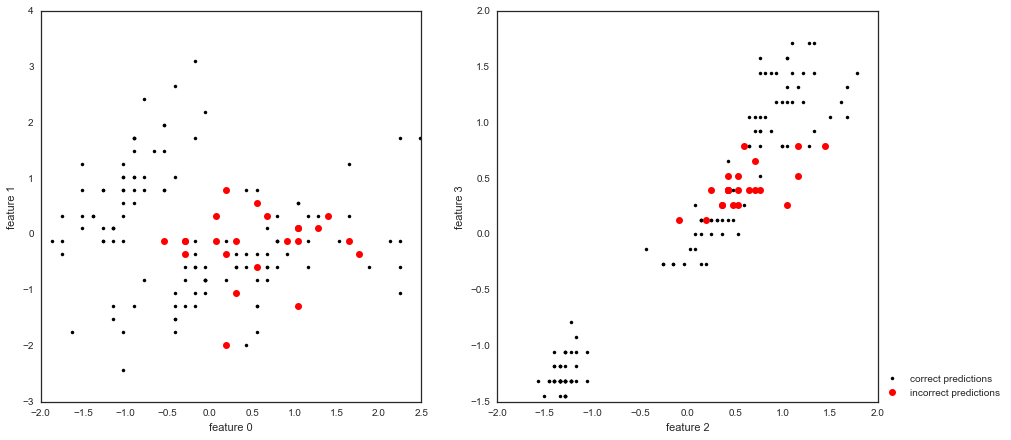

In [46]:
plt.figure(figsize=(15, 7))

plt.subplot(121)
plt.plot(iris.data[iris.target == predictions][:, 0],
         iris.data[iris.target == predictions][:, 1],
         'k.',
         label='correct predictions')
plt.plot(iris.data[iris.target != predictions][:, 0],
         iris.data[iris.target != predictions][:, 1],
         'ro',
         label='incorrect predictions')
plt.xlabel('feature 0')
plt.ylabel('feature 1')

plt.subplot(122)
plt.plot(iris.data[iris.target == predictions][:, 2],
         iris.data[iris.target == predictions][:, 3],
         'k.',
         label='correct predictions')
plt.plot(iris.data[iris.target != predictions][:, 2],
         iris.data[iris.target != predictions][:, 3],
         'ro',
         label='incorrect predictions')
plt.xlabel('feature 2')
plt.ylabel('feature 3')
plt.legend(loc=(1, 0));

Other useful libraries
--------

- GOAtools: GO terms enrichment analysis in python
- statmodels: advanced statistics
- rpy2: useful interface to R, when your favorite library doesn\'t have a python alternative
- pysam: read and manipulate sam files
- pyvcf: read and manipulate VCF files

...and many more